<img src="IMG/bandeaux/Diapositive5.PNG" align=left>

# CMEMS_3 DIVE 
# Part 1: interannual variability of the Leeuwin current

Start with reading this short introduction to the Leeuwin current variability [the Leeuwin current variability](DIVE/LEEUWIN/REFERENCES/iociclimatenotes_10.pdf).

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>
***

First, the notebook must be set up with all the necessary tools available from the Jupyter Notebook Ecosystem.

| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) allows carrying out scientific computing with Python and managing ND-arrays |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) handles netCDF files in an intuitive and interactive way. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python numerical plotting library |
| **cartopy** |[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a library for plotting 2D data on maps. |

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

-------------

We will use the following set of numerical simulations:

|  expe. name   | data assimilated        | atmos. forcing  |  covered period | horizontal resolution |
|---------------|-------------------------|-----------------|-----------------|-----------------------|
|  G4-ANA       |  alti/sst/insitu/ice    |  ECMWF oper     |  2007-now       | 1/4° (~25km)  |
|  G4-MY-REANA  |  alti/sst/insitu/ice    |  ECMWF ERAi     |   1993-2016     |  1/4° (~25km)  |
|   G4-MY-FREE  | none                    |  ECMWF ERAi     |   1993-2016     |  1/4° (~25km)  |
|   G12-ANA     | alti/sst/insitu/ice     |  ECMWF oper     |   2007-now      | 1/12° (~9km) |





We start by loading annual mean time-series from a global reanalysis system at 1/4°, NOAA SST observations for the same area and period (on the same grid, as it will be more convenient).

In [2]:
# define the paths of the netcdf files to use
path_file1 = 'DIVE/LEEUWIN/DATA/MOD/G4-MY-REANA_WA_ANNUAL_1993_2016_T_level1.nc'  # G4 reanalysis
path_file2 = 'DIVE/LEEUWIN/DATA/MOD/SST_NOAA_AVHRR_ORCA025.nc'                    # NOAA observations
path_file3 = 'DIVE/LEEUWIN/DATA/MOD/G4-MY-FREE_WA_ANNUAL_1993_2016_T_level1.nc'   # G4-MY-FREE

# open the netcdf files
file1 = xr.open_dataset(path_file1)  
file2 = xr.open_dataset(path_file2)
file3 = xr.open_dataset(path_file3)

The following command will help us display the data with respect to longitude and latitude.

In [3]:
# define the variables to plot
xlon = file1['nav_lon']
ylat = file1['nav_lat']

tglorys = file1['votemper']
sst_obs = file2['sosstobs']
tfree =  file3['votemper']

Let's plot the first four years and see if we see changes in SST.

In [4]:
date1 = np.datetime64('1996-07-01')
date2 = np.datetime64('1998-07-01')
date3 = np.datetime64('2001-07-01')
date4 = np.datetime64('2005-07-01')

/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


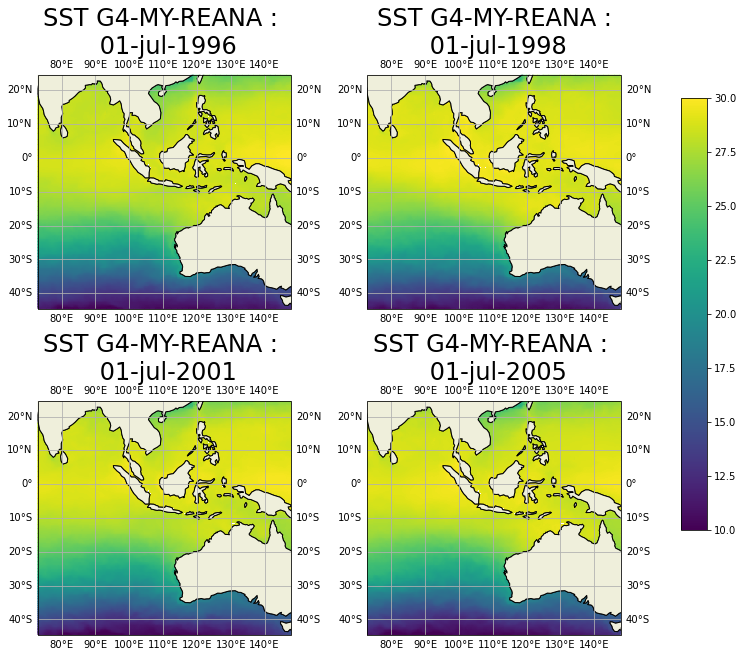

In [5]:
# define the caracteristics of the map 
f = plt.figure(figsize=(12, 12))
ax1 = f.add_subplot(221,projection=ccrs.PlateCarree())
ax2 = f.add_subplot(222,projection=ccrs.PlateCarree())
ax3 = f.add_subplot(223,projection=ccrs.PlateCarree())
ax4 = f.add_subplot(224,projection=ccrs.PlateCarree())

for ax in [ax1,ax2,ax3,ax4]:
    ax.coastlines()
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
    
# plot data
im = ax1.pcolor(xlon, ylat,np.array(tglorys.sel(time_counter=date1,method='nearest'))[0],vmin = 10, vmax= 30,shading='nearest')
im = ax2.pcolor(xlon, ylat,np.array(tglorys.sel(time_counter=date2,method='nearest'))[0],vmin = 10, vmax= 30,shading='nearest')
im = ax3.pcolor(xlon, ylat,np.array(tglorys.sel(time_counter=date3,method='nearest'))[0],vmin = 10, vmax= 30,shading='nearest')
im = ax4.pcolor(xlon, ylat,np.array(tglorys.sel(time_counter=date4,method='nearest'))[0],vmin = 10, vmax= 30,shading='nearest')

# legend
ax1.set_title("SST G4-MY-REANA : \n 01-jul-1996",fontsize=24)
ax2.set_title("SST G4-MY-REANA :\n 01-jul-1998",fontsize=24)
ax3.set_title("SST G4-MY-REANA : \n 01-jul-2001",fontsize=24)
ax4.set_title("SST G4-MY-REANA : \n 01-jul-2005",fontsize=24)

cbar_ax = f.add_axes([0.87, 0.3, 0.03, 0.5])
f.subplots_adjust(right = 0.8, hspace= 0.,wspace=0.3)
f.colorbar(im,cax=cbar_ax)

#save
plt.savefig('DIVE/FIGURES/Part1/SST_G4-MY-REANA_1996_1998_2001_2005.png')

One way to have a better view is to look at anomalies with respect to a climatology.

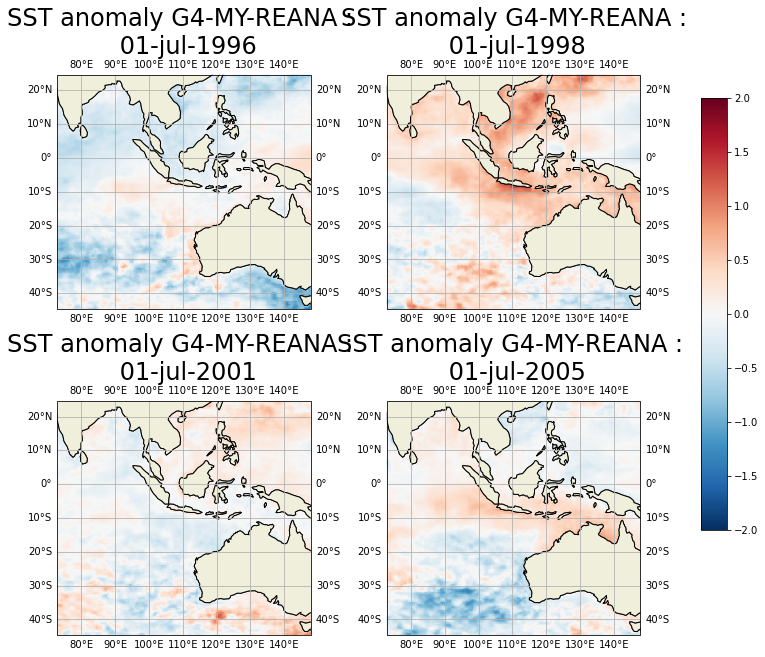

In [6]:
# define the variable to plot
tanom = tglorys - tglorys.mean('time_counter')

# define the caracteristics of the map 
f = plt.figure(figsize=(12, 12))
ax1 = f.add_subplot(221,projection=ccrs.PlateCarree())
ax2 = f.add_subplot(222,projection=ccrs.PlateCarree())
ax3 = f.add_subplot(223,projection=ccrs.PlateCarree())
ax4 = f.add_subplot(224,projection=ccrs.PlateCarree())

for ax in [ax1,ax2,ax3,ax4]:
    ax.coastlines()
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
    
# plot data
im = ax1.pcolor(xlon, ylat,np.array(tanom.sel(time_counter=date1,method='nearest'))[0],vmin = -2, vmax= 2,cmap='RdBu_r',shading='nearest')
im = ax2.pcolor(xlon, ylat,np.array(tanom.sel(time_counter=date2,method='nearest'))[0],vmin = -2, vmax= 2,cmap='RdBu_r',shading='nearest')
im = ax3.pcolor(xlon, ylat,np.array(tanom.sel(time_counter=date3,method='nearest'))[0],vmin = -2, vmax= 2,cmap='RdBu_r',shading='nearest')
im = ax4.pcolor(xlon, ylat,np.array(tanom.sel(time_counter=date4,method='nearest'))[0],vmin = -2, vmax= 2,cmap='RdBu_r',shading='nearest')

# legend
ax1.set_title("SST anomaly G4-MY-REANA : \n 01-jul-1996",fontsize=24)
ax2.set_title("SST anomaly G4-MY-REANA :\n 01-jul-1998",fontsize=24)
ax3.set_title("SST anomaly G4-MY-REANA : \n 01-jul-2001",fontsize=24)
ax4.set_title("SST anomaly G4-MY-REANA : \n 01-jul-2005",fontsize=24)

cbar_ax = f.add_axes([0.87, 0.3, 0.03, 0.5])
f.subplots_adjust(right = 0.8, hspace= 0.,wspace=0.3)
f.colorbar(im,cax=cbar_ax)

#save
plt.savefig('DIVE/FIGURES/Part1/SST_anom_G4-MY-REANA_1996_1998_2001_2005.png')


Let's look at the variance over the 23 years, and draw a box over the area of large variance in the Leeuwin current.

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


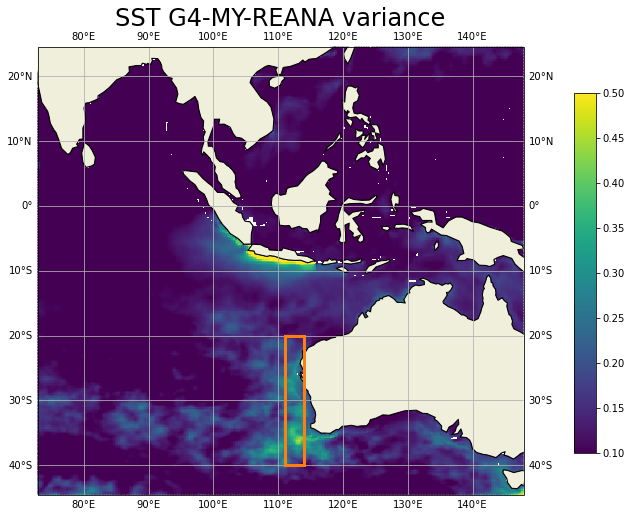

In [7]:
# define the caracteristics of the map 
f = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax.set_title("SST G4-MY-REANA variance",fontsize=24)

# plot data
im = ax.pcolor(xlon, ylat,np.array(tglorys.var('time_counter'))[0],vmin = 0.1, vmax= 0.5,shading='nearest')
ax.add_patch(mpatches.Rectangle(xy=[111, -40], width=3, height=20, linewidth =3, zorder=2 ,edgecolor='tab:orange',facecolor='none',transform=ccrs.PlateCarree()))

# legend
cbar_ax = f.add_axes([0.87, 0.25, 0.03, 0.5])
f.subplots_adjust(right = 0.8, hspace= 0.,wspace=0.3)
f.colorbar(im,cax=cbar_ax)

#save
plt.savefig('DIVE/FIGURES/Part1/SST_variance_G4-MY-REANA.png')

<div class="alert alert-block alert-success">

<b>Question 1 :</b> Plot the areas where interannual surface temperature variance exceeds 0.2°C.
</div>

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


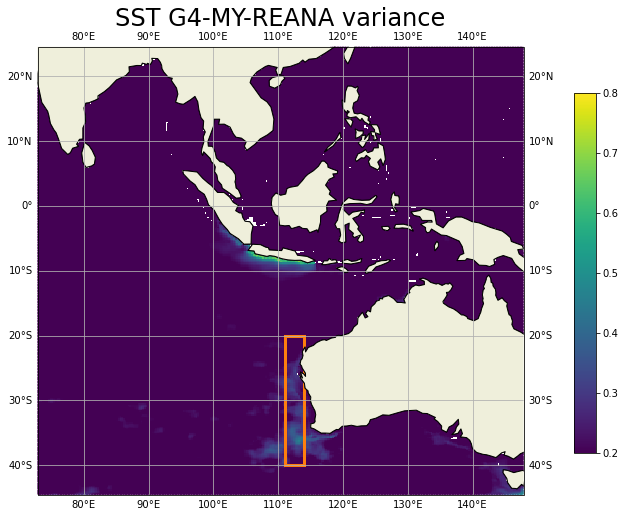

In [8]:
# define the caracteristics of the map 
f = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax.set_title("SST G4-MY-REANA variance",fontsize=24)

# plot data
im = ax.pcolor(xlon, ylat,np.array(tglorys.var('time_counter'))[0],vmin = 0.2, vmax= 0.8,shading='nearest')
ax.add_patch(mpatches.Rectangle(xy=[111, -40], width=3, height=20, linewidth =3 ,edgecolor='tab:orange',facecolor='none',transform=ccrs.PlateCarree()))

# legend
cbar_ax = f.add_axes([0.87, 0.25, 0.03, 0.5])
f.subplots_adjust(right = 0.8, hspace= 0.,wspace=0.3)
f.colorbar(im,cax=cbar_ax)

#save
plt.savefig('DIVE/FIGURES/Part1/SST_variance_G4-MY-REANA_0.2.png')

<div class="alert alert-block alert-success">

<b>Question 2:</b> Is it the same with observed SST ?
</div>

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


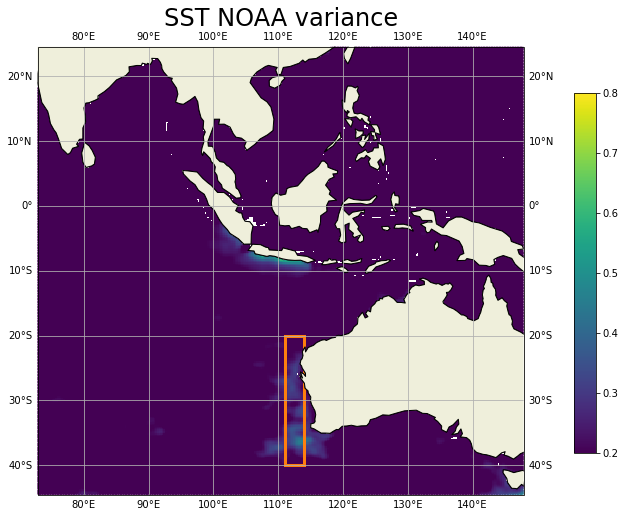

In [9]:
# define the caracteristics of the map 
f = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax.set_title("SST NOAA variance",fontsize=24)

# plot data
im = ax.pcolor(xlon, ylat,np.array(sst_obs.var('time_counter')),vmin = 0.2, vmax= 0.8,shading='nearest')
ax.add_patch(mpatches.Rectangle(xy=[111, -40], width=3, height=20, linewidth =3 ,edgecolor='tab:orange',facecolor='none',transform=ccrs.PlateCarree()))

# legend
cbar_ax = f.add_axes([0.87, 0.25, 0.03, 0.5])
f.subplots_adjust(right = 0.8, hspace= 0.,wspace=0.3)
f.colorbar(im,cax=cbar_ax)

#save
plt.savefig('DIVE/FIGURES/Part1/SST_variance_NOAA_0.2.png')

As you can see the spatial patterns are very similar, now let's look at the temporal correlation.

Let's plot the time series of the average observed SST in the red box along the Leuuwin current.

In [10]:
# define the coordinates of the box and get the indexes of the variables
lat1 = -40
lat2 = -20
lon1 = 111
lon2 = 114

idx_lon1 = np.nanargmin(np.abs(file1['nav_lon'][0,:].data-lon1))
idx_lon2 = np.nanargmin(np.abs(file1['nav_lon'][0,:].data-lon2))
idx_lat1 = np.nanargmin(np.abs(file1['nav_lat'][:,0].data-lat1))
idx_lat2 = np.nanargmin(np.abs(file1['nav_lat'][:,0].data-lat2))

# define the mean variables in the Leuuwin box 
    # G4-MY-REANA
tglorys_sub = tglorys[:,0,idx_lon1:idx_lon2,idx_lat1:idx_lat2]
tglorys_mean = tglorys_sub.mean('x').mean('y')
    # NOAA observations
sst_obs_sub = sst_obs[:,idx_lon1:idx_lon2,idx_lat1:idx_lat2]
sst_obs_mean = sst_obs_sub.mean('x').mean('y')
    # G4-MY-FREE
tfree_sub = tfree[:,0,idx_lon1:idx_lon2,idx_lat1:idx_lat2]
tfree_mean = tfree_sub.mean('x').mean('y')

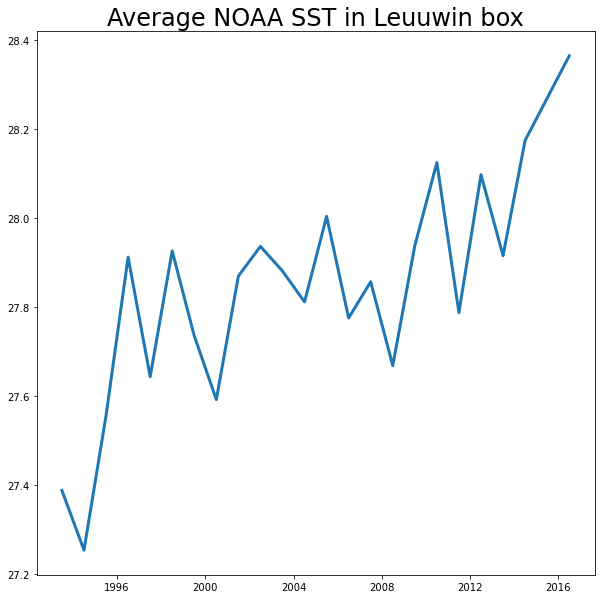

In [11]:
# caracteristics of the plot
f = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_title("Average NOAA SST in Leuuwin box",fontsize=24)

# plot
im, = ax.plot(file1['time_counter'].data,tglorys_mean,linewidth=3)

#save
plt.savefig('DIVE/FIGURES/Part1/Average_SST_NOAA.png')

Let's overlay the time series of the averaged SST of G4-MY-REANA in the same area.

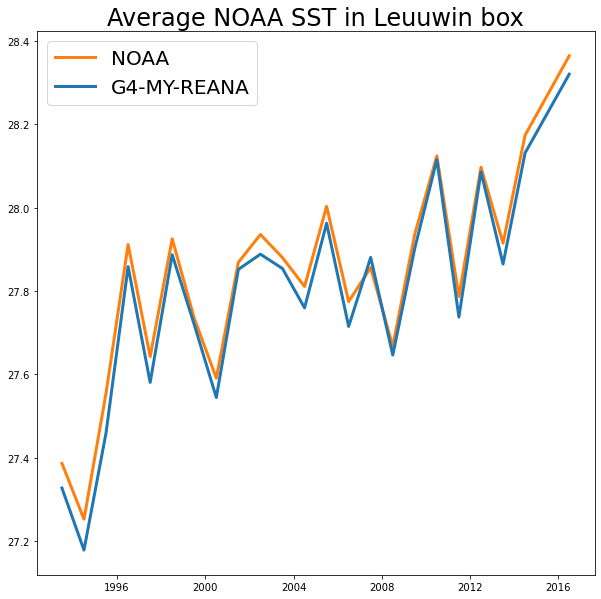

In [12]:
# caracteristics of the plot
f = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_title("Average NOAA SST in Leuuwin box",fontsize=24)

# plot
im1, = ax.plot(file1['time_counter'].data,tglorys_mean,c='tab:orange',linewidth=3,label='NOAA')
im2, = ax.plot(file2['time_counter'].data,sst_obs_mean,c='tab:blue',linewidth=3,label='G4-MY-REANA')

# legend
ax.legend(handles = [im1,im2],fontsize=20)

#save
plt.savefig('DIVE/FIGURES/Part1/Average_SST_NOAA+G4-MY-REANA.png')

<div class="alert alert-block alert-success">

<b>Question 3 :</b> Overlay G4-MY-FREE to this plot, what can you say about about data assimilation?
</div>

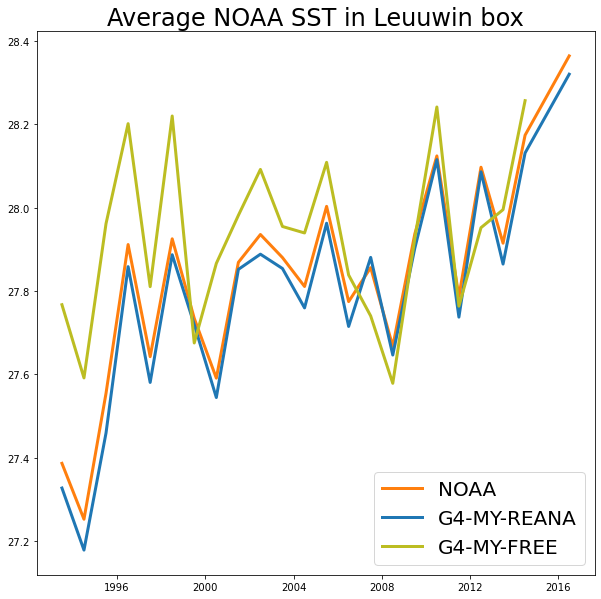

In [13]:
# caracteristics of the plot
f = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_title("Average NOAA SST in Leuuwin box",fontsize=24)

# plot
im1, = ax.plot(file1['time_counter'].data,tglorys_mean,c='tab:orange',linewidth=3,label='NOAA')
im2, = ax.plot(file2['time_counter'].data,sst_obs_mean,c='tab:blue',linewidth=3,label='G4-MY-REANA')
im3, = ax.plot(file3['time_counter'].data,tfree_mean,c='tab:olive',linewidth=3,label='G4-MY-FREE')
# legend
ax.legend(handles = [im1,im2,im3],fontsize=20)

#save
plt.savefig('DIVE/FIGURES/Part1/Average_SST_NOAA+G4-MY-REANA+G4-MY-FREE.png')

Now let's check the relationship with ENSO.

To monitor ENSO we will use a monthly time series with the monthly Southern Oscillation Index from NOAA, we also load the monthly NINO3.4 SST index from G4-REANA.

In [14]:
# read and format the text file NINO3.4 SST index
path_file4 = "DIVE/LEEUWIN/DATA/MOD/SST_monthly_GLORYS2V4_anom_GLORYS2V4-1993-2014_NINO34_1992-2015.txt"
file4 = open(path_file4, 'r')  
line_file4= file4.readlines()
line_file4[1]=line_file4[1].split(' ')
line_file4[1].pop(0)
nino34=[]
for i in range(288):
    nino34.append(float(line_file4[1][i]))
nino34=np.array(nino34)

# read and format the SOI text file
path_file5 = "DIVE/LEEUWIN/DATA/SOI_index_NOAA.txt"
file5 = open(path_file5, 'r')  
line_file5= file5.readlines()
for i in range(len(line_file5)):
    line_file5[i]=line_file5[i].split(',')
    line_file5[i][1]=line_file5[i][1].rstrip('\n')

# define the SOI variable
SOI=[]
for i in range(288):
    SOI.append(float(line_file5[i][1]))
SOI=np.array(SOI)

# define the time variable : 288 months from 1992-01
date1 = np.datetime64('1992-01')
times = []
for i in range(288):
    times.append(date1+ i)

Our temperature anomaly in the Leeuwin region will be our Leeuwin index.

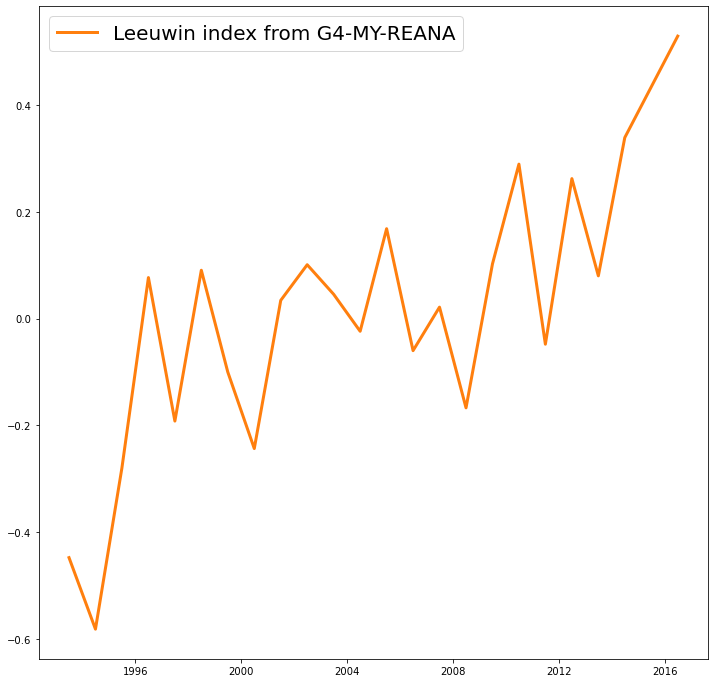

In [15]:
leeuwin_ind = tglorys_mean - tglorys_mean.mean('time_counter')

# caracteristics of the plot
f = plt.figure(figsize=(12, 12))
ax = plt.axes()

# plot
im1, = ax.plot(file1['time_counter'],leeuwin_ind,c='tab:orange',linewidth=3,label='Leeuwin index from G4-MY-REANA')

# legend
ax.legend(handles = [im1],fontsize=20)

#save
plt.savefig('DIVE/FIGURES/Part1/indexes_G4.png')

Now let's plot the ENSO indexes.

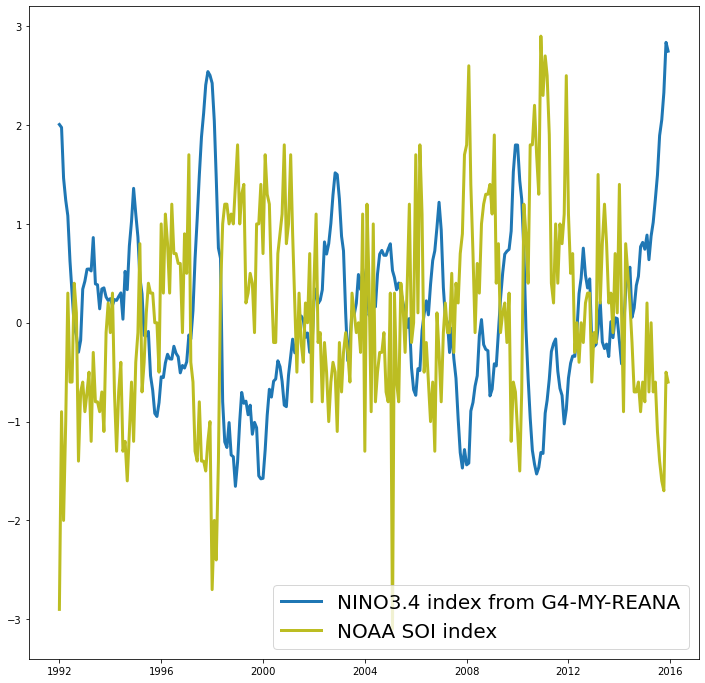

In [16]:
# caracteristics of the plot
f = plt.figure(figsize=(12, 12))
ax = plt.axes()

# plot
im2, = ax.plot(times,nino34,c='tab:blue',linewidth=3,label='NINO3.4 index from G4-MY-REANA')
im3, = ax.plot(times,SOI,c='tab:olive',linewidth=3,label='NOAA SOI index')


# legend
ax.legend(handles = [im2,im3],fontsize=20)

#save
plt.savefig('DIVE/FIGURES/Part1/indexes_G4_NINO34.png')

<div class="alert alert-block alert-success">

<b>Question 4 :</b> Overlay on this graph the Leeuwin index. Can you point out on this graph the "La Nina" events?
</div>

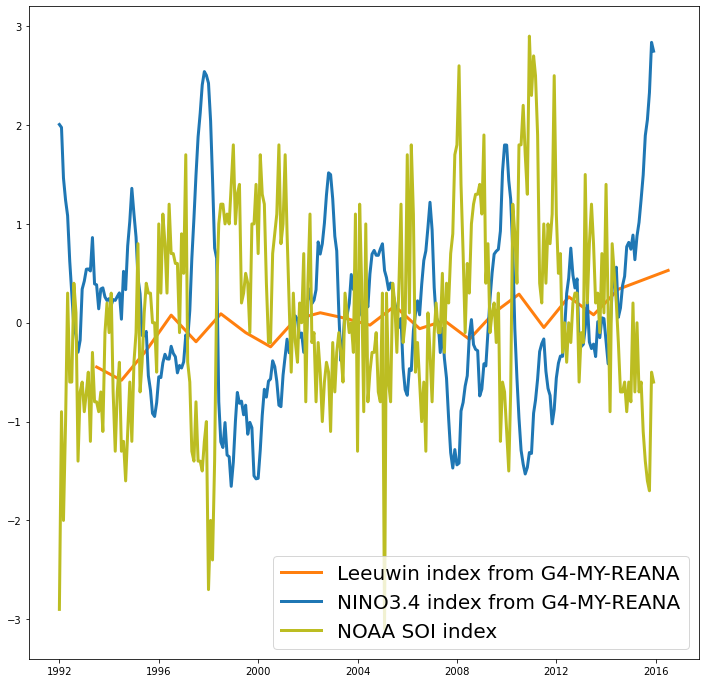

In [17]:
# caracteristics of the plot
f = plt.figure(figsize=(12, 12))
ax = plt.axes()


# plot
im1, = ax.plot(file1['time_counter'],leeuwin_ind,c='tab:orange',linewidth=3,label='Leeuwin index from G4-MY-REANA')
im2, = ax.plot(times,nino34,c='tab:blue',linewidth=3,label='NINO3.4 index from G4-MY-REANA')
im3, = ax.plot(times,SOI,c='tab:olive',linewidth=3,label='NOAA SOI index')

# legend
ax.legend(handles = [im1,im2,im3],fontsize=20)

#save
plt.savefig('DIVE/FIGURES/Part1/indexes_G4_NINO34_SOI.png')

----------------------
Now let's focus on the currents in the 0-100m layer.

In [18]:
# define the paths of the netcdf files to use
path_file6 = 'DIVE/LEEUWIN/DATA/MOD/G4-ANA_WA_ANNUAL_2006_2016_U_0_300.nc'
path_file7 = 'DIVE/LEEUWIN/DATA/MOD/G4-ANA_WA_ANNUAL_2006_2016_V_0_300.nc'

# open the netcdf files
file6 = xr.open_dataset(path_file6)
file7 = xr.open_dataset(path_file7)

# define the variables to plot
U=file6['vozocrtx']
V=file7['vomecrty']

We will have a look at a vertical section of meridional current during a "La Nina" event and a "El Nino" event.

In [19]:
# define the vertical section and the dates 
lat = -20
lon1 = 100
lon2 = 120
date1 = np.datetime64('2010-12-01')
date2 = np.datetime64('2009-12-01')

# get the indexes in the variables
idx_lon1 = np.nanargmin(np.abs(file6['nav_lon'][0,:].data-lon1))
idx_lon2 = np.nanargmin(np.abs(file6['nav_lon'][0,:].data-lon2))
idx_lat = np.nanargmin(np.abs(file6['nav_lat'][:,0].data-lat))
idx_t1 = np.nanargmin(np.abs((file6['time_counter']-date1).astype('float')))
idx_t2 = np.nanargmin(np.abs((file6['time_counter']-date2).astype('float')))

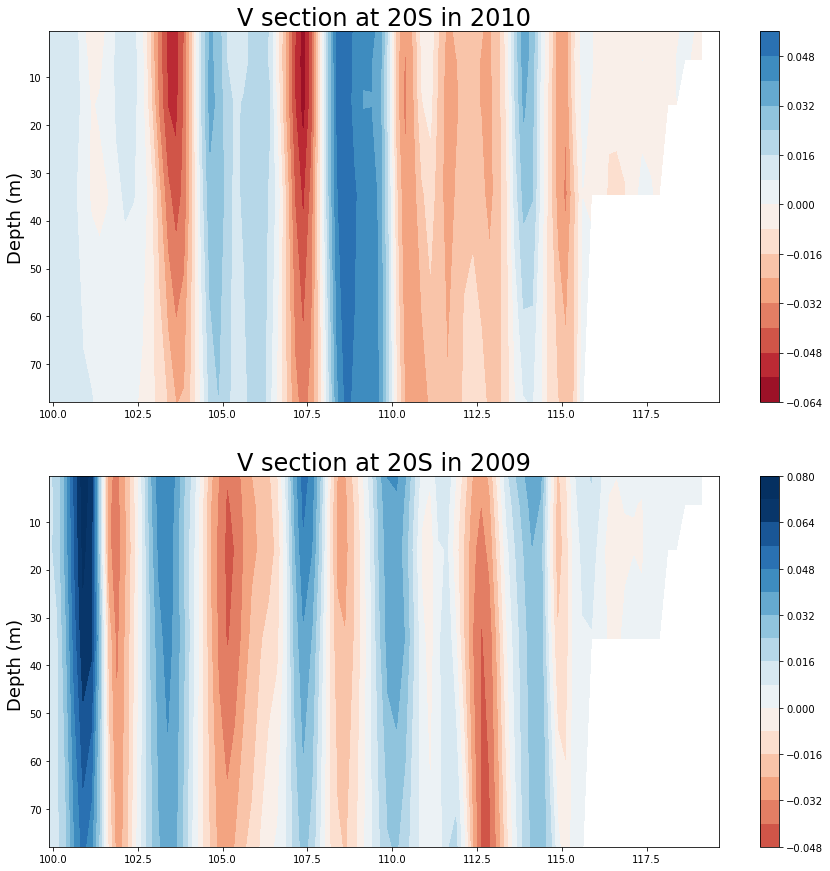

In [20]:
# define the caracteristics of the plot
f = plt.figure(figsize=(15,15))
ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

# first plot 
ax1.set_title("V section at 20S in 2010",fontsize=24)
ax1.set_ylabel("Depth (m)",fontsize=18)
ax1.invert_yaxis()
im1 = ax1.contourf(file6['nav_lon'][0,idx_lon1:idx_lon2],
                  file6['deptht'],
                  V[idx_t1,:,idx_lat,idx_lon1:idx_lon2]-V[:,:,idx_lat,idx_lon1:idx_lon2].mean('time_counter'), 15,
                  vmin = -0.07, vmax = 0.07, cmap = 'RdBu')

f.colorbar(im1,ax=ax1)

# second plot
ax2.set_title("V section at 20S in 2009",fontsize=24)
ax2.set_ylabel("Depth (m) ",fontsize=18)
ax2.invert_yaxis()
im2 = ax2.contourf(file6['nav_lon'][0,idx_lon1:idx_lon2],
                  file6['deptht'],
                  V[idx_t2,:,idx_lat,idx_lon1:idx_lon2]-V[:,:,idx_lat,idx_lon1:idx_lon2].mean('time_counter'),15,
                  vmin = -0.07, vmax = 0.07, cmap = 'RdBu')
f.colorbar(im2,ax=ax2)

# save
plt.savefig('DIVE/FIGURES/Part1/vertical_section_20S_2009_2010.png')

<div class="alert alert-block alert-success">

<b>Question 5 :</b> What do you see? Try with other Nino/Nina events.
</div>

With the simple tools above, we can also explore G12-ANA and G4-ANA, the outputs of the 
CMEMS GLO MFC near-real time monitoring and forecasting systems.

In [21]:
# define the paths of the netcdf files to use
path_file8 = 'DIVE/LEEUWIN/DATA/MOD/G12-ANA_WA_ANNUAL_2006_2016_T_surf.nc'
path_file9 = 'DIVE/LEEUWIN/DATA/MOD/G4-ANA_WA_ANNUAL_2006_2016_T.nc'

# open the netcdf files
file8 = xr.open_dataset(path_file8)
file9 = xr.open_dataset(path_file9)

# define the variables to plot
tg12ana=file8['votemper']
tg4ana=file9['votemper']

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


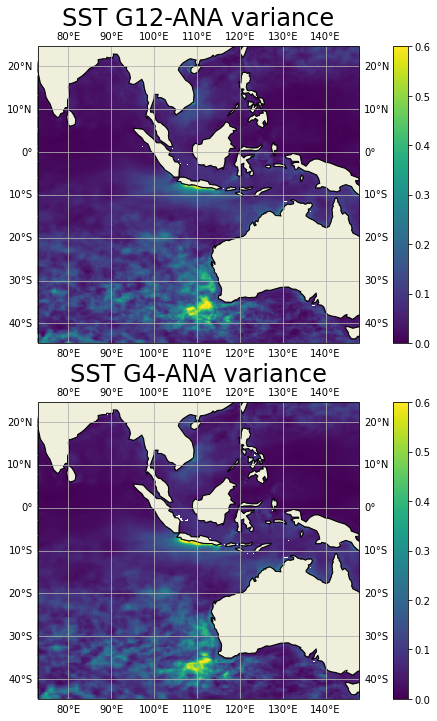

In [22]:
# define the caracteristics of the plot
f = plt.figure(figsize=(12, 12))
ax1 = f.add_subplot(211,projection=ccrs.PlateCarree())
ax2 = f.add_subplot(212,projection=ccrs.PlateCarree())

for ax in [ax1,ax2,ax3,ax4]:
    ax.coastlines()
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')

# plot data
im1 = ax1.pcolor(file9['nav_lon'][0,:], file9['nav_lat'][:,0],tg12ana.var('time_counter')[0],vmin = 0, vmax= 0.6,shading='nearest')
im2 = ax2.pcolor(file9['nav_lon'][0,:], file9['nav_lat'][:,0],tg4ana.var('time_counter')[0],vmin = 0, vmax= 0.6,shading='nearest')


# legend
ax1.set_title("SST G12-ANA variance",fontsize=24)
ax2.set_title("SST G4-ANA variance",fontsize=24)
f.colorbar(im2,ax=ax2)
f.colorbar(im1,ax=ax1)

# save
plt.savefig('DIVE/FIGURES/Part1/G12-ANA_G4-ANA_variance.png')

In [23]:
# define the coordinates of the box and get the indexes of the variables
lat1 = -40
lat2 = -20
lon1 = 111
lon2 = 114

idx_lon1 = np.nanargmin(np.abs(file1['nav_lon'][0,:].data-lon1))
idx_lon2 = np.nanargmin(np.abs(file1['nav_lon'][0,:].data-lon2))
idx_lat1 = np.nanargmin(np.abs(file1['nav_lat'][:,0].data-lat1))
idx_lat2 = np.nanargmin(np.abs(file1['nav_lat'][:,0].data-lat2))

# define the mean variables in the Leuuwin box 
tg12ana_sub = tg12ana[:,0,idx_lon1:idx_lon2,idx_lat1:idx_lat2]
tg12ana_mean = tg12ana_sub.mean('x').mean('y')

tg4ana_sub = tg4ana[:,0,idx_lon1:idx_lon2,idx_lat1:idx_lat2]
tg4ana_mean = tg4ana_sub.mean('x').mean('y')


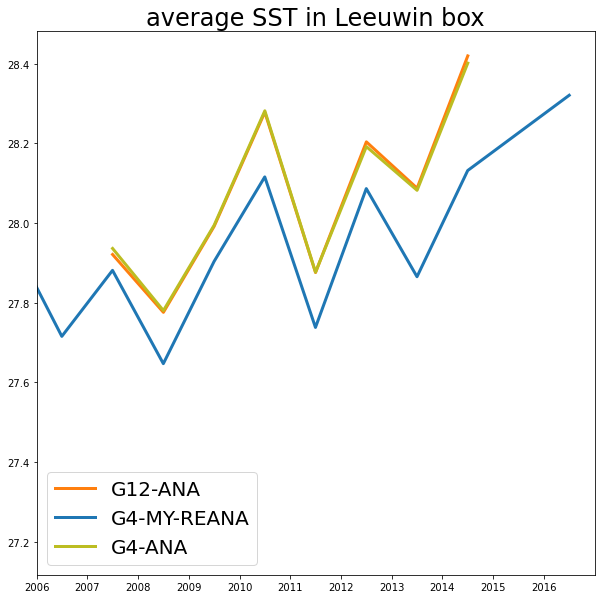

In [24]:
# caracteristics of the plot
f = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_title("average SST in Leeuwin box",fontsize=24)

# plot
im1, = ax.plot(file8['time_counter'].data,tg12ana_mean,c='tab:orange',linewidth=3,label='G12-ANA')
im2, = ax.plot(file2['time_counter'].data,sst_obs_mean,c='tab:blue',linewidth=3,label='G4-MY-REANA')
im3, = ax.plot(file9['time_counter'],tg4ana_mean,c='tab:olive',linewidth=3,label='G4-ANA')

ax.legend(handles = [im1,im2,im3],fontsize=20)
ax.set_xlim(np.datetime64('2006-01-01'),np.datetime64('2016-12-31'))
#save
plt.savefig('DIVE/FIGURES/Part1/Average_SST_G12_G4_G4.png')

<div class="alert alert-block alert-success">

<b>Question 6 :</b> Can you comment on the differences and similarities that you observe between the REANA and ANA systems? Between G12 and G4?
</div>